In [27]:
%matplotlib notebook

In [28]:
import pandas as pd #数据分析
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [29]:
%precision 2

'%.2f'

In [30]:
def setBarLabels(axe): 
    from matplotlib.pyplot import Rectangle
    ylim1,ylim2=bars.get_ylim()
    lim=(ylim2-ylim1)%5
    for rect in axe.get_children():
        #print(rect)
        if type(rect)==Rectangle:
            height = rect.get_height()
            #print(height)
            plt.text(rect.get_x(),height+lim , '%.2f' % float(height)) 
            #plt.text(rect.get_x(),1.02*height , '%.3f' % float(height))
def setBarhLabels(axe): 
    from matplotlib.pyplot import Rectangle
    xlim1,xlim2=bars.get_xlim()
    lim=(xlim2-xlim1)/100
    for rect in axe.get_children():
        if type(rect)==Rectangle:
            #zeroX = rect.get_zorder.get_x
            width = rect.get_width()
            plt.text(width+lim,rect.get_y(),'%.3f' % float(width))
            #plt.text(rect.get_x()+lim,rect.get_y(),'%.3f' % float(width))

In [31]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")
data_full = pd.concat([data_train,data_test])
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:

data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
data_full.iloc[890:,:].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154


<IPython.core.display.Javascript object>


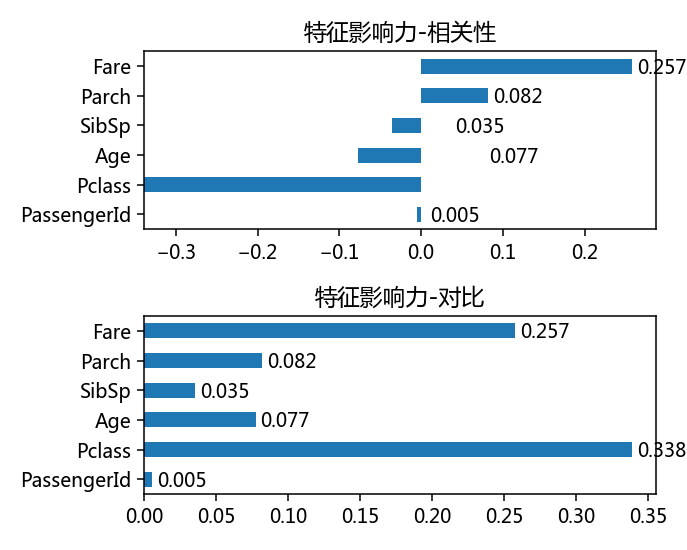

In [35]:
#各特征之间的关系
plt.figure(figsize=(5,4))
ax1=plt.subplot(2,1,1)
bars=data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0).plot.barh(ax=ax1)
setBarhLabels(bars)
plt.title("特征影响力-相关性")
ax2=plt.subplot(2,1,2)
bars=abs(data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0)).plot.barh(ax=ax2)
setBarhLabels(bars)
plt.title("特征影响力-对比")
plt.tight_layout()


<IPython.core.display.Javascript object>


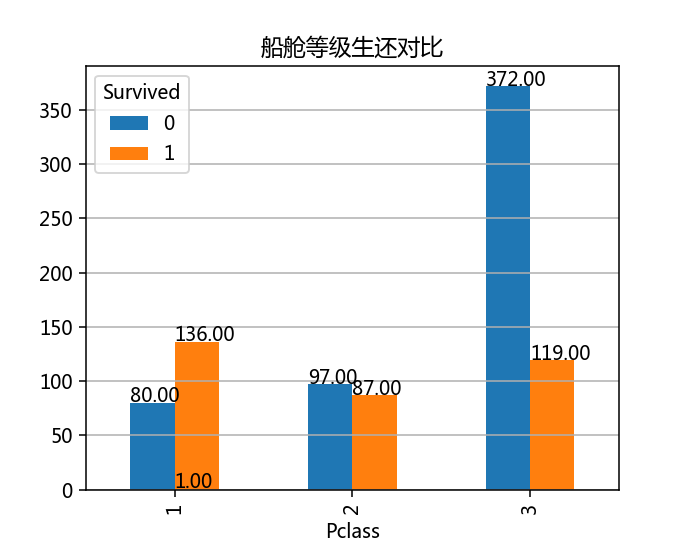

In [36]:
plt.figure(figsize=(5,4))
ax1=plt.subplot(1,1,1)
bars=data_train.groupby(by=['Pclass']).Survived.value_counts().unstack().plot.bar(ax=ax1);
setBarLabels(bars)
plt.grid(axis='y')
plt.title('船舱等级生还对比');

可以看出:  
Pclass=1 的生还人数比未生还人数多  
Pclass=2 的生还人数比未生还人数基本持平  
Pclass=3 的未生还人数远远高出生还人数  

In [37]:
def plot_distribution( df , var , target , **kwargs ):
    import seaborn as sns
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

<IPython.core.display.Javascript object>


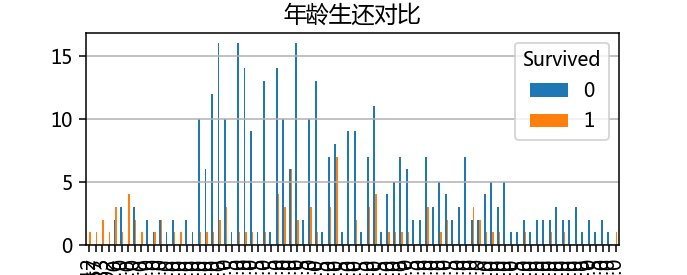

In [38]:
plt.figure(figsize=(5,2))
ax1=plt.subplot(1,1,1)
bars=data_train[data_train.Sex=='male'].groupby(by=['Age']).Survived.value_counts().unstack().plot.bar(ax=ax1);
plt.grid(axis='y')
plt.title('年龄生还对比');
#plot_distribution(data_train, var = 'Age' , target = 'Survived' , row = 'Sex')

In [39]:
data_full.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


# 提取特征

In [40]:
import re
#人名中带有称呼，可以提取出来
#data_full.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())
data_train['Title']=data_train.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())
data_test['Title']=data_train.Name.apply(lambda x: re.split('\.',re.split('[,()]',x)[1])[0].strip())

In [41]:
#传票里貌似也有类别信息
data_train['Ticket_Title']=data_train.Ticket.apply(lambda x: ''.join(re.split(' ',x)[0:len(re.split(' ',x))-1]).strip())
data_test['Ticket_Title']=data_test.Ticket.apply(lambda x: ''.join(re.split(' ',x)[0:len(re.split(' ',x))-1]).strip())

In [43]:

data_train['Ticket_Title2']=data_train.Ticket_Title.replace('\W','',regex=True)
data_test['Ticket_Title2']=data_test.Ticket_Title.replace('\W','',regex=True)
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title,Ticket_Title2
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,A.5.,A5
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr,PC,PC
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mrs,SOTON/O.Q.,SOTONOQ
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mrs,,
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Miss,,


In [44]:
data_full = pd.concat([data_train,data_test])

# 数据预处理

In [45]:
data_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title,Ticket_Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,A/5,A5


## 1.缺失数据补齐

训练集数据：  
记录总数 : 891  
Age : 714  
Cabin : 204 缺失很多  
Embarked : 889 只确实2条  

测试集数据：  
记录总数 : 418  
Age : 332  
Cabin : 91 缺失很多

In [46]:
#年龄使用全船人员平均年龄补充
data_train.Age.fillna(data_full.Age.mean(),inplace=True)
data_train.Embarked.fillna('X',inplace=True)

#顺便将测试数据也补齐
data_test.Age.fillna(data_full.Age.mean(),inplace=True)
data_test.Embarked.fillna('X',inplace=True)
#data_test.Fare.fillna(data_full.Fare.groupby(by=[Pclass]),inplace=True)
data_test['Fare']=data_test.groupby("Pclass").Fare.transform(lambda x: x.fillna(x.mean()))
#Cabin 类型暂不处理

In [47]:
#data_full.groupby(by=['Pclass']).Fare.mean()
#data_full.groupby("Pclass").Fare.transform(lambda x: x.fillna(x.mean()))

In [48]:
data_full = pd.concat([data_train,data_test])
data_test[data_test.Fare.isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title,Ticket_Title2


In [49]:
data_full.Embarked.unique()

array(['S', 'C', 'Q', 'X'], dtype=object)

## 2.数据标准化

In [50]:
from sklearn import preprocessing
#Sex、Embarked、Ticket字段都是
le_Title = preprocessing.LabelEncoder()
le_Ticket_Title = preprocessing.LabelEncoder()
le_Sex = preprocessing.LabelEncoder()
le_Embarked = preprocessing.LabelEncoder()
le_Title.fit(data_full.Title)
le_Ticket_Title.fit(data_full.Ticket_Title)
le_Sex.fit(data_full.Sex)
le_Embarked.fit(data_full.Embarked)



LabelEncoder()

In [51]:
le_Ticket_Title2 = preprocessing.LabelEncoder()
le_Ticket_Title2.fit(data_full.Ticket_Title2)

LabelEncoder()

In [57]:
data_train['STitle']=le_Title.transform(data_train.Title)
data_train['STicket_Title']=le_Ticket_Title.transform(data_train.Ticket_Title)
data_train['SSex']=le_Sex.transform(data_train.Sex)
data_train['SEmbarked']=le_Embarked.transform(data_train.Embarked)

data_test['STitle']=le_Title.transform(data_test.Title)
data_test['STicket_Title']=le_Ticket_Title.transform(data_test.Ticket_Title)
data_test['SSex']=le_Sex.transform(data_test.Sex)
data_test['SEmbarked']=le_Embarked.transform(data_test.Embarked)

In [58]:
data_train['STicket_Title2']=le_Ticket_Title2.transform(data_train.Ticket_Title2)
data_test['STicket_Title2']=le_Ticket_Title2.transform(data_test.Ticket_Title2)

## 特征重要性分析


In [59]:
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Title,Ticket_Title2,STicket_Title2,STitle,STicket_Title,SSex,SEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A/5,A5,3,11,6,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC,PC,14,12,22,0,0


<IPython.core.display.Javascript object>


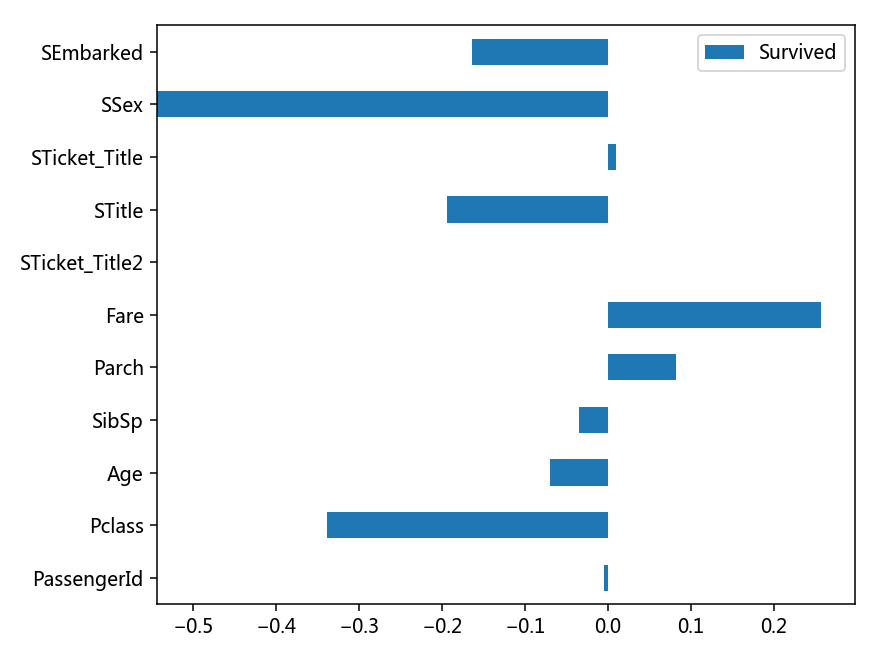

In [60]:
#相关性
data_train.corr().drop('Survived',axis=0).loc[:,['Survived']].plot.barh()
plt.tight_layout()

In [61]:
#Cabin略去
X_Columns=['Pclass','Age','SibSp','Parch','Fare','STitle', 'STicket_Title', 'SSex', 'SEmbarked','STicket_Title2']
data_train_X=data_train[X_Columns]
data_train_y=data_train['Survived']

In [62]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Modelling Algorithms
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,GradientBoostingRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV

c:\python3.5.1\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#scatter_matrix(data_train_X);

In [63]:
validation_size = 0.40
seed = 7
train_X, valid_X, train_y, valid_y = model_selection.train_test_split(data_train_X, data_train_y, test_size=validation_size, random_state=seed)

In [64]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegressionCV()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, data_train_X, data_train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.794644 (0.028622)
LDA: 0.790150 (0.032385)
KNN: 0.719463 (0.034360)
CART: 0.776729 (0.037172)
NB: 0.782285 (0.020627)
SVM: 0.673408 (0.049794)
RFC: 0.817091 (0.040042)


<IPython.core.display.Javascript object>


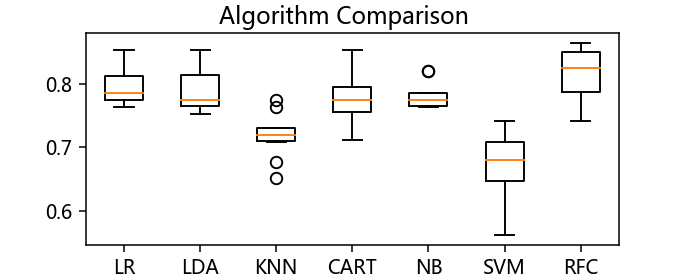

In [65]:
# Compare Algorithms
fig = plt.figure(figsize=(5,2))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
model = RandomForestClassifier(class_weight='balanced')

In [67]:
model.fit(data_train_X,data_train_y)
scores = model_selection.cross_val_score(model, data_train_X, data_train_y, cv=kfold, scoring=scoring)
print(scores.mean(),scores.std())

0.802484394507 0.0372398606511


In [69]:
X_Columns=['Pclass','Age','SibSp','Parch','Fare','STitle', 'STicket_Title','STicket_Title2', 'SSex', 'SEmbarked']
data_test_X=data_test[X_Columns]
data_test_y = model.predict(data_test_X)

In [70]:
data_test_y.shape

(418,)

In [71]:
submission=pd.DataFrame()
submission['PassengerId'] = data_test['PassengerId']
submission['Survived'] = data_test_y
submission.shape

(418, 2)

In [72]:
submission.to_csv('submission20170509_2.csv',index =False)

In [73]:
for name, model in models:
    rfecv = RFECV( estimator = model , step = 1 , cv = StratifiedKFold( train_y , 2 ) , scoring = 'accuracy' )
    try:
        rfecv.fit( train_X , train_y )
        print (name,rfecv.score( train_X , train_y ) , rfecv.score( valid_X , valid_y ))
    except:
        print (name)

LR 0.810861423221 0.750700280112
LDA 0.816479400749 0.773109243697
KNN
CART 0.99063670412 0.739495798319
NB
SVM
RFC 0.98127340824 0.787114845938


In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
model = RandomForestClassifier()
scores = model_selection.cross_val_score(model, data_train_X, data_train_y, cv=kfold)
model = Ridge()
print(scores.mean(),scores.std())
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])
param_grid=dict(alpha=alphas)
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(train_X,train_y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.810337078652 0.0393252006368
0.41628167239
1.0


## 多项式

In [ ]:
poly = PolynomialFeatures(3,interaction_only =True,include_bias=True)
new_X=poly.fit_transform(data_train_X)
model = RandomForestClassifier(class_weight='balanced')
model.fit(new_X,data_train_y)
scores = model_selection.cross_val_score(model, new_X, data_train_y, cv=kfold, scoring=scoring)
print(scores.mean(),scores.std())


In [ ]:
#多项式
n_samples = 30
degrees = [1,2,3,4]
X = data_train_X
y = data_train_y
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    model = RandomForestClassifier()
    #pipeline = Pipeline([("polynomial_features", polynomial_features),
    #                     ("linear_regression", linear_regression)])
    #pipeline.fit(X[:, np.newaxis], y)
    new_X = polynomial_features.fit_transform(X)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(model, new_X, y, cv=kfold, scoring=scoring)
    print('Degree:%i Score: Mean-%.3f  Std-%.3f' % (degrees[i],scores.mean(), scores.std()))

## Plotting Learning Curves  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(8,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



In [ ]:
#digits = load_digits()
X, y = data_train_X,data_train_y

if 1==2:
    title = "Learning Curves (Naive Bayes)"
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = GaussianNB()
    plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
if 1==2:
    title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
    estimator = SVC(gamma=0.001)
    plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)
if 1==1:
    title = "Learning Curves (RandomForestClassifier, $\gamma=0.001$)"
    cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
    estimator = RandomForestClassifier()
    plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)
    plt.tight_layout()

In [ ]:
## 

## Underfitting vs. Overfitting

In [ ]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


plt.figure(figsize=(9,3))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.tight_layout()